Before continue ensure that the Libraries Importation cell runs without any errors. If so continue to run the rest of the file, otherwise assure all dependencies are properly installed. To do so, run in a terminal the following commands:
```
pip3 install matplotlib
pip3 install pandas
pip3 install openpyxl
```

In [29]:
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import pandas as pd
import numpy as np
import os

In [15]:
def database_compiler (start_year, end_year, export=False):
    dataframe = pd.DataFrame()
    for year in range(start_year, end_year, 5):
        filedata = pd.read_excel("RQAS TIET04200 - {}-{}.xlsx".format(year, year + 5))
        dataframe = dataframe.append(filedata, ignore_index=True)
    if export:
        dataframe.to_excel("RQAS TIET04200 - 1976-2021.xlsx", index=False)
    else:
        return dataframe

In [37]:
# Checks if the concatenated file exists, otherwise load each individual file and concatenate them:
if not os.path.exists("RQAS TIET04200 - 1976-2021.xlsx"):
    database_compiler(1976,2021, export=True)


dateparse = lambda dates: [datetime.strptime(date, "%d/%m/%Y") for d in dates]
# Loads the concatenated file:
df = pd.read_excel("RQAS TIET04200 - 1976-2021.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10172 entries, 0 to 10171
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Período DE               10172 non-null  datetime64[ns]
 1   Período ATE              10172 non-null  datetime64[ns]
 2   Cod_Interaguas           10172 non-null  int64         
 3   Tipo Rede                10172 non-null  object        
 4   UGRHI                    10172 non-null  object        
 5   Código Ponto             10172 non-null  object        
 6   Status Ponto             10172 non-null  object        
 7   Data Coleta              10172 non-null  datetime64[ns]
 8   Hora Coleta              10172 non-null  object        
 9   Parametro                10172 non-null  object        
 10  Sinal                    1418 non-null   object        
 11  Valor                    10172 non-null  object        
 12  Unidade                  10172 n

In [46]:
df['Período DE'] = pd.to_datetime(df['Período DE'], infer_datetime_format=True)
df['Período ATE'] = pd.to_datetime(df['Período ATE'], infer_datetime_format=True)

df['Data Coleta'] = pd.to_datetime(df['Data Coleta'], infer_datetime_format=True)

df['Valor']=df['Valor'].replace(',','.',regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10172 entries, 0 to 10171
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Período DE               10172 non-null  datetime64[ns]
 1   Período ATE              10172 non-null  datetime64[ns]
 2   Cod_Interaguas           10172 non-null  int64         
 3   Tipo Rede                10172 non-null  object        
 4   UGRHI                    10172 non-null  object        
 5   Código Ponto             10172 non-null  object        
 6   Status Ponto             10172 non-null  object        
 7   Data Coleta              10172 non-null  datetime64[ns]
 8   Hora Coleta              10172 non-null  object        
 9   Parametro                10172 non-null  object        
 10  Sinal                    1418 non-null   object        
 11  Valor                    10172 non-null  object        
 12  Unidade                  10172 n

In [17]:
df['Parametro'].unique()

array(['pH', 'Temperatura da Água', 'Temperatura do Ar',
       'Subst. Tensoat. reagem c/ Azul Metileno', 'Turbidez',
       'Fenóis Totais', 'Nitrogênio Kjeldahl', 'Nitrogênio-Nitrito',
       'Nitrogênio-Nitrato', 'Nitrogênio Amoniacal',
       'Oxigênio Dissolvido', 'DBO (5, 20)', 'DQO',
       'Sólido Dissolvido Total', 'Sólido Total', 'Sólido Volátil Total',
       'Fósforo Total', 'Cloreto Total', 'Crômio Total', 'Manganês Total',
       'Ferro Total', 'Ferro Dissolvido', 'Níquel Total', 'Cobre Total',
       'Zinco Total', 'Coliformes Totais - TTM',
       'Coliformes Termotolerantes', 'Estanho Total', 'Bário Total',
       'Mercúrio Total', 'Chumbo Total', 'Coloração',
       'Chuvas nas últimas 24h', 'Sólido Fixo', 'Cádmio Total',
       'Sólido Suspenso Total', 'Condutividade', 'Fósforo-Ortofosfato',
       'Alumínio Total', 'Sulfato Total', 'Arsênio Total',
       'Carbono Orgânico Total', 'Sólido Dissolvido Fixo',
       'Alumínio Dissolvido', 'Cobre Dissolvido',
       'C

In [57]:
# Creates a df copy for a given parameter to avoid the case where changing the original df also changes these:
def df_by_parameter(parameter):
    df_slice = df.loc[df['Parametro'] == parameter , ['Data Coleta', 'Valor']].copy()
    df_slice['Valor'] = pd.to_numeric(df_slice['Valor'])
    return df_slice
# Creates a df copy for each relevant parameter:
df_pH = df_by_parameter('pH')
df_Fos = df_by_parameter('Fósforo Total')
df_DBO = df_by_parameter('DBO (5, 20)')
df_Nit = df_by_parameter('Nitrogênio Total')
df_ColFec = df_by_parameter('Coliformes Totais - TTM')
df_Temp = df_by_parameter('Temperatura da Água')
df_Turb = df_by_parameter('Turbidez')
df_Res = df_by_parameter('Sólido Total')
def_OxDis = df_by_parameter('Oxogênio Dissolvido')

In [59]:
df_pH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 10129
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data Coleta  305 non-null    datetime64[ns]
 1   Valor        305 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.1 KB


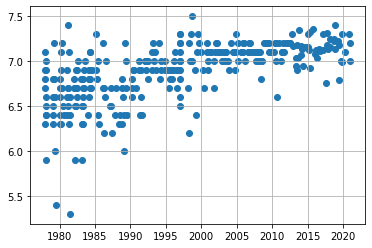

In [62]:
df_parameters_list = [df_pH, df_Fos, df_DBO, df_Nit, df_ColFec, df_Temp, df_Turb, df_Res, def_OxDis]

for df_parameter in df_parameters_list:
    
plt.scatter(df_pH['Data Coleta'], df_pH['Valor'])
plt.grid()
plt.show()



In [ ]:
w1, w2, w3, w4, w5, w6, w7, w8, w9 = [0.10, 0.12, 0.10, 0.10, 0.15, 0.10, 0.08, 0.17]

def df_IQA ():
    